# Casimir Diagrams

Software architecture and flow diagrams

## Table of Contents

* [Install Packages](#install-packages)
* [ETL Architecture](#etl-architecture)

## Install Packages

The primary package is [diagrams](https://diagrams.mingrammer.com/), a library for drawing Graphviz diagrams with common architecture components.

In [1]:
from diagrams import Diagram, Edge
from diagrams.k8s.compute import StatefulSet
from diagrams.aws.compute import EC2
from diagrams.aws.storage import S3
from diagrams.aws.analytics import Athena, GlueDataCatalog

## ETL Architecture

> 🚧 This is a work in progress, consider the current diagram a placeholder with no actual impact on development.

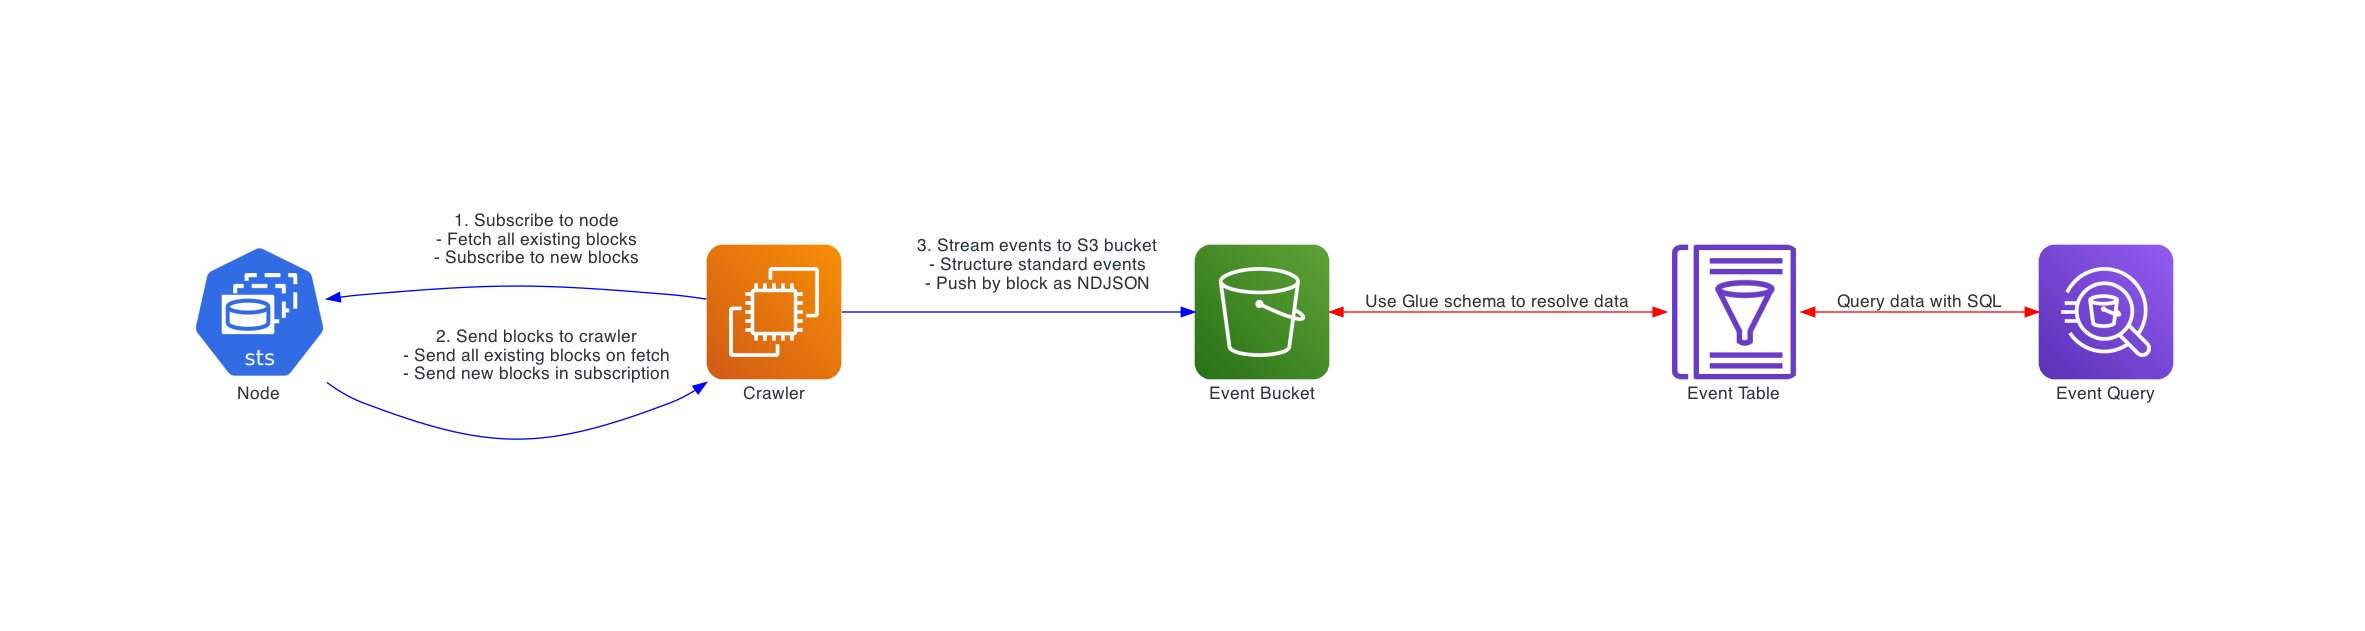

In [2]:
graph_attr = {
    "splines": "spline",
    "concentrate": "true",
}

edge_attr = {
    "nojustify": "true",
}

with Diagram(graph_attr=graph_attr, edge_attr=edge_attr, show=False, filename="content/diagrams/etl") as etl:

    node = StatefulSet("Node")
    crawler = EC2("Crawler")

    edge_1 = """
        1. Subscribe to node
        - Fetch all existing blocks
        - Subscribe to new blocks
        """

    edge_2 = """
        2. Send blocks to crawler
        - Send all existing blocks on fetch
        - Send new blocks in subscription
        """

    node << Edge(label=edge_1, color="blue") << crawler
    node >> Edge(label=edge_2, color="blue") >> crawler
    
    event_bucket = S3("Event Bucket")
    edge_3 = """
        3. Stream events to S3 bucket
        - Structure standard events
        - Push by block as NDJSON
        """

    crawler >> Edge(label=edge_3, color="blue") >> event_bucket

    event_bucket >> \
    Edge(label="Use Glue schema to resolve data", color="red") << \
    GlueDataCatalog("Event Table") >> \
    Edge(label="Query data with SQL", color="red") << \
    Athena("Event Query")
etl